3
6
9
12
15


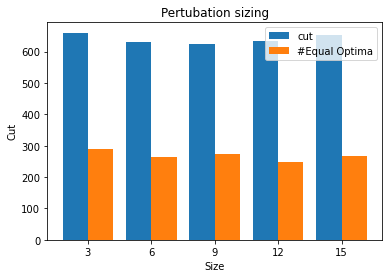

9
passrun0
passrun1
passrun2
passrun3
passrun4
passrun5
passrun6
passrun7
passrun8
passrun9


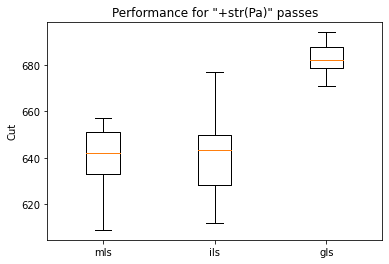

avg time mls:1.292325496673584
avg time ils:1.3242937803268433
avg time gls:1.4824443578720092
mls vs gls 
MannwhitneyuResult(statistic=0.0, pvalue=0.0001806347208075351)
mls vs ils 
MannwhitneyuResult(statistic=50.0, pvalue=1.0)
gls vs ils 
MannwhitneyuResult(statistic=98.0, pvalue=0.0003281333148201423)
timerun0
timerun1
timerun2
timerun3
timerun4
timerun5
timerun6
timerun7
timerun8
timerun9


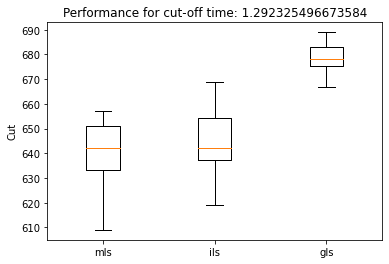

avg time mls:1.292325496673584
avg time ils:1.2998023986816407
avg time gls:1.3816080570220948
mls vs gls 
MannwhitneyuResult(statistic=0.0, pvalue=0.0001806347208075351)
mls vs ils 
MannwhitneyuResult(statistic=42.0, pvalue=0.5701699724963722)
gls vs ils 
MannwhitneyuResult(statistic=99.0, pvalue=0.00024348671429732876)


In [108]:
import random
import numpy as np
import Linkedlist as Linkedlist
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
dat = read_file("Graph500.txt")
Pa = 1000
runs = 10





# Practical 2 Evolutionary Computing

# Local search algorithms iteratively change a solution until no better solution is found in
# the neighborhood of the current solution.
# The local search algorithm used is the FiducciaMattheyses (FM) heuristic.
# MLS, ILS, and GLS are metaheuristic algorithms that improve
# the performance of the local search algorithm.
""""def fm(dat, L):
    main.fm(dat,L)"""
    
"""def fm2(dat,L,passes):
    main.fm2(dat,L,passes)"""

def fm(vertices, L):
    
    rand_string = L
    cut = count_edges(rand_string)
    while True:
        last_cut = cut
        rand_string = Mutate(rand_string,2)
        cut = count_edges(rand_string)
        

        if cut >= last_cut:
            break

    return rand_string, cut

def fm2(vertices, L, passes):
    
    rand_string = L
    cut = count_edges(rand_string)
    while passes <= Pa:
        last_cut = cut
        rand_string = Mutate(rand_string,2)
        cut = count_edges(rand_string)
        passes += 2

        if cut >= last_cut:
            break

    return rand_string, cut,passes

    


#Reading the graph that needs to be partitioned
def extractDigits(lst):
    total = []
    for el in lst:
        new = el.split(' ')
        new_list = [x for x in new if x != '']
        newlist = new_list[:1] + new_list[2:]
        final = [int(i) for i in newlist]
        total.append(final)
    return total


def read_file(filename):
    lines = open(filename).read().splitlines()
    vertices = extractDigits(lines)
    return vertices


# Generates a list of even length with equal amount of zeros and ones
def get_random_string(N):
    data= np.zeros(N, dtype=int)
    F=int(N/2)
    data[:F] = 1
    np.random.shuffle(data)
    return data

#Generates  a population of such lists
def generate_data(N):

    pop=[]
    for i in range(N):
        pop.append(get_random_string(500))

    return pop




# MLS applies FM for random initial solutions for 10000 passes
def MLS():
    t_begin =time.time()
    
    cost = 0 
    passes=0
    while passes < Pa:
        a= get_random_string(500)
        
        last_cost = cost 
        
        s,cost,passes=fm2(dat,a,passes)

        if cost < last_cost: 
            S=[s,cost]
        
        
    T = time.time() - t_begin
        
    
    return S, T
        

# Crossover opperator that generates 1 ofsspring list
def uniform(A,B):
    
    # If the hamming distance is larger than l/2  all bit values of one parent are inverted
    D = np.count_nonzero(A != B)
    if D > len(A)/2 :
        A = 2**A % 2
        D = len(A) - D
        
    S= get_random_string(D)
    
    off1 = A
    j = 0
    for i in range(len(A)):
        if A[i] != B[i]:
            off1[i] = S[j]
            j += 1

    return off1

# GLS applies FM to offspring of a population 
def GLS(N,T):
    t_begin =time.time()
    POP= generate_data(N)
    
    PopOpt = []
    for e in POP:
        fit = count_edges(e)
        PopOpt.append([e,fit])
    
    
    if T != 0:
        t_end =time.time() + T
        while time.time() < t_end:
        

            
            A = random.sample(range(0,50), 2)

            off = uniform(PopOpt[A[0]][0],PopOpt[A[1]][0])
            
            off, offcost = fm(dat,off)
            



            PopOpt.sort(key = lambda row: row[1])
            if PopOpt[0][1] >= offcost:
                del PopOpt[0]
                PopOpt.append([off,offcost])
                
    # If T=0 we run the algorithm for 10000 passes      
    else:
        passes = 0
        while passes < Pa:
            A = random.sample(range(0,50), 2)

            off = uniform(PopOpt[A[0]][0],PopOpt[A[1]][0])
            
            off, offcost,passes = fm2(dat,off,passes)

            PopOpt.sort(key = lambda row: row[1])
            if PopOpt[0][1] >= offcost:
                del PopOpt[0]
                PopOpt.append([off,offcost])
    
    
    PopOpt.sort(key = lambda row: row[1],reverse=True)
    
    t=time.time()- t_begin
    return PopOpt[0],t



# the cost function:

def count_edges(list):
    
    F=0
    
    for i in range(0,500):
        if list[i] == 1:
            for j in range(0,len(dat[i])-2):
                a = dat[i][j+2]

                if list[i] != list[int(a)-1]:
                    F= F+1
    return F


#swaps to bits, one from one to zero and one from zero to one
def Mutate(S,Size):

    for i in range(0,Size):
        while True:
            A = random.randint(0, 499)
            B = random.randint(0, 499)
            if S[A] != S[B]:
                a = S[A]
                S[A] = S[B]
                S[B] = a
                break
    return S

    
    


# ILS applies FM to the mutation of the previous best string
def ILS(size,T):
    counter=0
    t_begin =time.time()
    S = get_random_string(500)
    if T != 0:
        t_end =time.time() + T
        Sopt,fit1 = fm(dat,S)
        while time.time() < t_end:
            
            
            Smut = Mutate(Sopt, size)
            Sopt2,fit2 = fm(dat,Smut)
            if Sopt is Sopt2:
                counter+=1
            else:

                if fit1 >= fit2:
                    Sopt = Sopt2
                    fit1 = fit2
    else:
        passes = 0
        
        Sopt,fit1,passes = fm2(dat,S,passes)
        while passes < Pa:

            Smut = Mutate(Sopt, size)
            Sopt2,fit2,passes= fm2(dat,Smut,passes)
            if Sopt is Sopt2:
                counter+=1
            else:

                if fit1 >= fit2:
                    Sopt = Sopt2
                    fit1 = fit2


    t=time.time()- t_begin
    return [Sopt,fit1],t, counter


#applies ILS forincrementally increasing #swaps per mutation untill improvement stops
def find_pertubation_size(T,start,increment):
    count=0
    results = []
    fit = 1000
    while count < 2:
        print(start)
        Soptfit,t, counter = ILS(start,T)
        
        results.append([start,Soptfit[1],t,counter])
        
        start+=increment
        
        
        if Soptfit[1] > fit:
            count+=1
        else:
            count=0
        fit = Soptfit[1]
    #results.sort(key = lambda row: row[1])
    return results
        
        
        
        
        

def runforpasses(ILSsize):
    mls = []
    ils = []
    gls = []
    for i in range(0,runs):

        print("passrun" + str(i))
        MLS_result = MLS()
        mls.append(MLS_result)
        T=MLS_result[1]
        gls.append(GLS(50,0))
                
        ils.append(ILS(ILSsize,0))
            
    return mls,gls,ils

def runfortime(ILSsize, mls):
    #cutoff time is set to avg mls time:
    T= np.mean([e[1] for e in mls])
    
    ils = []
    gls = []
    for i in range(0,runs):
        print("timerun" + str(i))

        gls.append(GLS(50,T))
                
        ils.append(ILS(ILSsize,T))
            
    return mls,gls,ils,T
            
def plotpert():
    pert = find_pertubation_size(0,3,3)

    # x-coordinates of left sides of bars 
    X = [e[0] for e in pert]



    # naming the x-axis
    plt.xlabel('Size')
    # naming the y-axis
    plt.ylabel('Cut')
    # plot title
    plt.title('Pertubation sizing')



    Y = [e[1] for e in pert]
    Z = [e[3] for e in pert]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, Y, 0.4, label = 'cut')
    plt.bar(X_axis + 0.2, Z, 0.4, label = '#Equal Optima')

    plt.xticks(X_axis, X)
    plt.legend()
    plt.show()
    
    
    pert.sort(key = lambda row: row[1])
    
    return pert[0][0]

    
def plotpasses(ILSsize):
    mls,gls,ils = runforpasses(ILSsize)
    mlscuts = [e[0][1] for e in mls]
    glscuts = [e[0][1] for e in gls]
    ilscuts = [e[0][1] for e in ils]

    mlstimes = np.mean([e[1] for e in mls])
    glstimes = np.mean([e[1] for e in gls])
    ilstimes = np.mean([e[1] for e in ils])

    plt.boxplot([mlscuts,ilscuts,glscuts])
    
    
    # naming the x-axis
    plt.xlabel('')
    
    plt.xticks([1, 2, 3], ["mls","ils","gls"])
  
    # naming the y-axis
    plt.ylabel('Cut')
    # plot title
    plt.title('Performance for "+str(Pa)" passes')
    plt.show()
    
    print("avg time mls:" + str(mlstimes))
    print("avg time ils:" + str(ilstimes))
    print("avg time gls:" + str(glstimes))
    
    #perform the Mann-Whitney U test
    print("mls vs gls ")
    print(stats.mannwhitneyu(mlscuts, glscuts, alternative='two-sided'))
    print("mls vs ils ")
    print(stats.mannwhitneyu(mlscuts, ilscuts, alternative='two-sided'))
    print("gls vs ils " )
    print(stats.mannwhitneyu(glscuts, ilscuts, alternative='two-sided'))
    return mls

    
def plotruntime(ILSsize,mls):
    mls,gls,ils,T = runfortime(ILSsize,mls)
    mlscuts = [e[0][1] for e in mls]
    glscuts = [e[0][1] for e in gls]
    ilscuts = [e[0][1] for e in ils]

    mlstimes = np.mean([e[1] for e in mls])
    glstimes = np.mean([e[1] for e in gls])
    ilstimes = np.mean([e[1] for e in ils])

    plt.boxplot([mlscuts,ilscuts,glscuts])
    
    
    # naming the x-axis
    plt.xlabel('')
    
    plt.xticks([1, 2, 3], ["mls","ils","gls"])
  
    # naming the y-axis
    plt.ylabel('Cut')
    # plot title
    plt.title('Performance for cut-off time: ' + str(T) )
    plt.show()
    
    print("avg time mls:" + str(mlstimes))
    print("avg time ils:" + str(ilstimes))
    print("avg time gls:" + str(glstimes))
    
    #perform the Mann-Whitney U test
    print("mls vs gls ")
    print(stats.mannwhitneyu(mlscuts, glscuts, alternative='two-sided'))
    print("mls vs ils ")
    print(stats.mannwhitneyu(mlscuts, ilscuts, alternative='two-sided'))
    print("gls vs ils " )
    print(stats.mannwhitneyu(glscuts, ilscuts, alternative='two-sided'))



IdealSize = plotpert()
print(IdealSize)
mls = plotpasses(IdealSize)
plotruntime(IdealSize,mls)
    

    
    
    
